In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
import tensorflowjs as tfjs
import os
import pickle
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
print(tf.config.list_physical_devices('GPU'))

[]


In [2]:
# Constants
BATCH_SIZE = 128
LR = 1e-4

In [3]:
# Load training data
with open('data/matches/diamond.ds', 'rb') as f:
    training_data = pickle.load(f)

In [4]:
# Partition Dataset
train_len = int(training_data[0].shape[0] * 0.9)

train_x = training_data[0][:train_len]
train_y = training_data[1][:train_len]

test_x = training_data[0][train_len:]
test_y = training_data[1][train_len:]

In [5]:
def create_model():
    model = keras.Sequential()
    model.add(layers.Dense(128, input_dim=170))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1))
    return model
model = create_model()

In [6]:
loss = losses.MeanAbsoluteError()
optimizer = optimizers.Adam(learning_rate=LR)
model.compile(loss=loss, optimizer=optimizer)

In [7]:
history = model.fit(train_x, train_y, batch_size=BATCH_SIZE, validation_split=0.1, epochs=200, verbose=1)

Epoch 1/200
994/994 [==============================] - 1s 884us/step - loss: 0.1827 - val_loss: 0.1753
Epoch 2/200
994/994 [==============================] - 1s 793us/step - loss: 0.1780 - val_loss: 0.1746
Epoch 3/200
994/994 [==============================] - 1s 790us/step - loss: 0.1771 - val_loss: 0.1742
Epoch 4/200
994/994 [==============================] - 1s 783us/step - loss: 0.1767 - val_loss: 0.1740
Epoch 5/200
994/994 [==============================] - 1s 783us/step - loss: 0.1764 - val_loss: 0.1738
Epoch 6/200
994/994 [==============================] - 1s 790us/step - loss: 0.1761 - val_loss: 0.1744
Epoch 7/200
994/994 [==============================] - 1s 788us/step - loss: 0.1759 - val_loss: 0.1738
Epoch 8/200
994/994 [==============================] - 1s 787us/step - loss: 0.1755 - val_loss: 0.1740
Epoch 9/200
994/994 [==============================] - 1s 781us/step - loss: 0.1753 - val_loss: 0.1757
Epoch 10/200
994/994 [==============================] - 1s 798us/step - l

Epoch 80/200
994/994 [==============================] - 1s 801us/step - loss: 0.1630 - val_loss: 0.1793
Epoch 81/200
994/994 [==============================] - 1s 799us/step - loss: 0.1628 - val_loss: 0.1793
Epoch 82/200
994/994 [==============================] - 1s 822us/step - loss: 0.1628 - val_loss: 0.1796
Epoch 83/200
994/994 [==============================] - 1s 824us/step - loss: 0.1626 - val_loss: 0.1793
Epoch 84/200
994/994 [==============================] - 1s 814us/step - loss: 0.1626 - val_loss: 0.1790
Epoch 85/200
994/994 [==============================] - 1s 796us/step - loss: 0.1625 - val_loss: 0.1791
Epoch 86/200
994/994 [==============================] - 1s 792us/step - loss: 0.1623 - val_loss: 0.1791
Epoch 87/200
994/994 [==============================] - 1s 797us/step - loss: 0.1623 - val_loss: 0.1799
Epoch 88/200
994/994 [==============================] - 1s 801us/step - loss: 0.1621 - val_loss: 0.1798
Epoch 89/200
994/994 [==============================] - 1s 801us

994/994 [==============================] - 1s 788us/step - loss: 0.1579 - val_loss: 0.1828
Epoch 159/200
994/994 [==============================] - 1s 788us/step - loss: 0.1578 - val_loss: 0.1814
Epoch 160/200
994/994 [==============================] - 1s 846us/step - loss: 0.1577 - val_loss: 0.1819
Epoch 161/200
994/994 [==============================] - 1s 891us/step - loss: 0.1576 - val_loss: 0.1818
Epoch 162/200
994/994 [==============================] - 1s 906us/step - loss: 0.1577 - val_loss: 0.1811
Epoch 163/200
994/994 [==============================] - 1s 815us/step - loss: 0.1576 - val_loss: 0.1815
Epoch 164/200
994/994 [==============================] - 1s 810us/step - loss: 0.1575 - val_loss: 0.1818
Epoch 165/200
994/994 [==============================] - 1s 807us/step - loss: 0.1576 - val_loss: 0.1821
Epoch 166/200
994/994 [==============================] - 1s 809us/step - loss: 0.1575 - val_loss: 0.1815
Epoch 167/200
994/994 [==============================] - 1s 798us/ste

In [8]:
history_dict = history.history

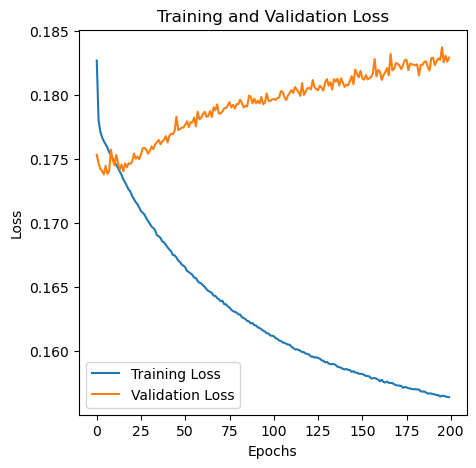

In [9]:
plt.figure(figsize=(5, 5))
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
a = tf.keras.models.load_model('models/diamond.h5')

TypeError: MeanAbsoluteError.__init__() got an unexpected keyword argument 'fn'

In [10]:
model.save('models/challenger.h5')